In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("DailyActivities.csv")
df

# First Question

### More Understandable Chart

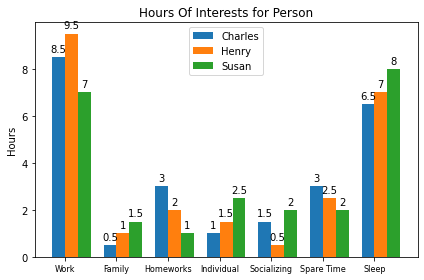

In [6]:
labels = df["Area of Interest"].to_list()
charles_values = df["Charles"].to_list()
henry_values = df["Henry"].to_list()
susan_value = df["Susan"].to_list()

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, charles_values, width, label='Charles')
rects2 = ax.bar(x + width/2, henry_values, width, label='Henry')
rects3 = ax.bar(x + width*1.5, susan_value, width, label='Susan')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Hours')
ax.set_title('Hours Of Interests for Person')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

plt.setp(ax.get_xticklabels(), fontsize=8)

fig.tight_layout()

plt.show()

# Second Question

### Missing Data Imputation

In [7]:
df = pd.read_csv("country_vaccination_stats.csv")
df

,country,date,daily_vaccinations,vaccines
0,Argentina,12/29/2020,NaN,Sputnik V
1,Argentina,12/30/2020,15656.0,Sputnik V
2,Argentina,12/31/2020,15656.0,Sputnik V
3,Argentina,1/1/2021,11070.0,Sputnik V
4,Argentina,1/2/2021,8776.0,Sputnik V
...,...,...,...,...
1497,Wales,1/20/2021,11105.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1498,Wales,1/21/2021,12318.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1499,Wales,1/22/2021,15148.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1500,Wales,1/23/2021,17371.0,"Oxford/AstraZeneca, Pfizer/BioNTech"


In [8]:
#Impute minimum
df["daily_vaccinations"] = df.groupby("country").transform(lambda x: x.fillna(0) if np.isnan(x.min())
                                                           else x.fillna(x.min()))

In [9]:
df

,country,date,daily_vaccinations,vaccines
0,Argentina,12/29/2020,6483.0,Sputnik V
1,Argentina,12/30/2020,15656.0,Sputnik V
2,Argentina,12/31/2020,15656.0,Sputnik V
3,Argentina,1/1/2021,11070.0,Sputnik V
4,Argentina,1/2/2021,8776.0,Sputnik V
...,...,...,...,...
1497,Wales,1/20/2021,11105.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1498,Wales,1/21/2021,12318.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1499,Wales,1/22/2021,15148.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1500,Wales,1/23/2021,17371.0,"Oxford/AstraZeneca, Pfizer/BioNTech"


# Third Question

### Top-3 Countries With Highest Median

In [10]:
#Display highest 3 median
df.groupby("country").median().sort_values(by="daily_vaccinations", ascending=False)[:3]

,daily_vaccinations
country,
United States,378253.0
China,276786.0
India,173922.0


# Fourth Question

### Number of Total Vaccinations Done in 1/6/2021

In [11]:
#Sum of total vaccinations in a specific date
df[df["date"] == "1/6/2021"]["daily_vaccinations"].sum()

1485255.0

# Sixth Question

### Extract Link From Database

In [12]:
%load_ext sql

In [13]:
%sql sqlite:///devices.db

In [14]:
%%sql
SELECT * FROM Main;

 * sqlite:///devices.db
Done.


Device_Type,Stats_Access_Link
AXO145,<url>https://xcd32112.smart_meter.com </url>
TRU151,<url>http://tXh67.dia_meter.com </url>
ZOD231,<url>http://yT5495.smart_meter.com </url>
YRT326,<url>http://ret323_TRu.crown.com </url>
LWR245,<url>http://luwr3243.celcius.com </url>


In [15]:
%%sql
SELECT substr(Stats_Access_Link, pos1+2, pos2-9) AS Extracted_Link
FROM
  (SELECT *,
          instr(Stats_Access_Link,'//') AS pos1,
          instr(Stats_Access_Link, '.com') AS pos2
   FROM Main)

 * sqlite:///devices.db
Done.


Extracted_Link
xcd32112.smart_meter.com
tXh67.dia_meter.com
yT5495.smart_meter.com
ret323_TRu.crown.com
luwr3243.celcius.com
